In [33]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import lib
import myPlot
import my_neuron as neuron

/Users/giulio/Desktop/tesi/git/dev/my_neuron.py:386: RuntimeWarning: underflow encountered in double_scalars
  var.open_prob.set(open_prob_temp, i)
/Users/giulio/Desktop/tesi/git/dev/my_neuron.py:391: RuntimeWarning: underflow encountered in double_scalars
  # open_prob => Probability of having one release during the AP, with N=1
/Users/giulio/Desktop/tesi/git/dev/lib.py:64: RuntimeWarning: underflow encountered in multiply
  O = time_step*1000*(k_plus*Ca_pre - probabilities/taus) + probabilities
/Users/giulio/Desktop/tesi/git/dev/lib.py:64: RuntimeWarning: underflow encountered in true_divide
  O = time_step*1000*(k_plus*Ca_pre - probabilities/taus) + probabilities


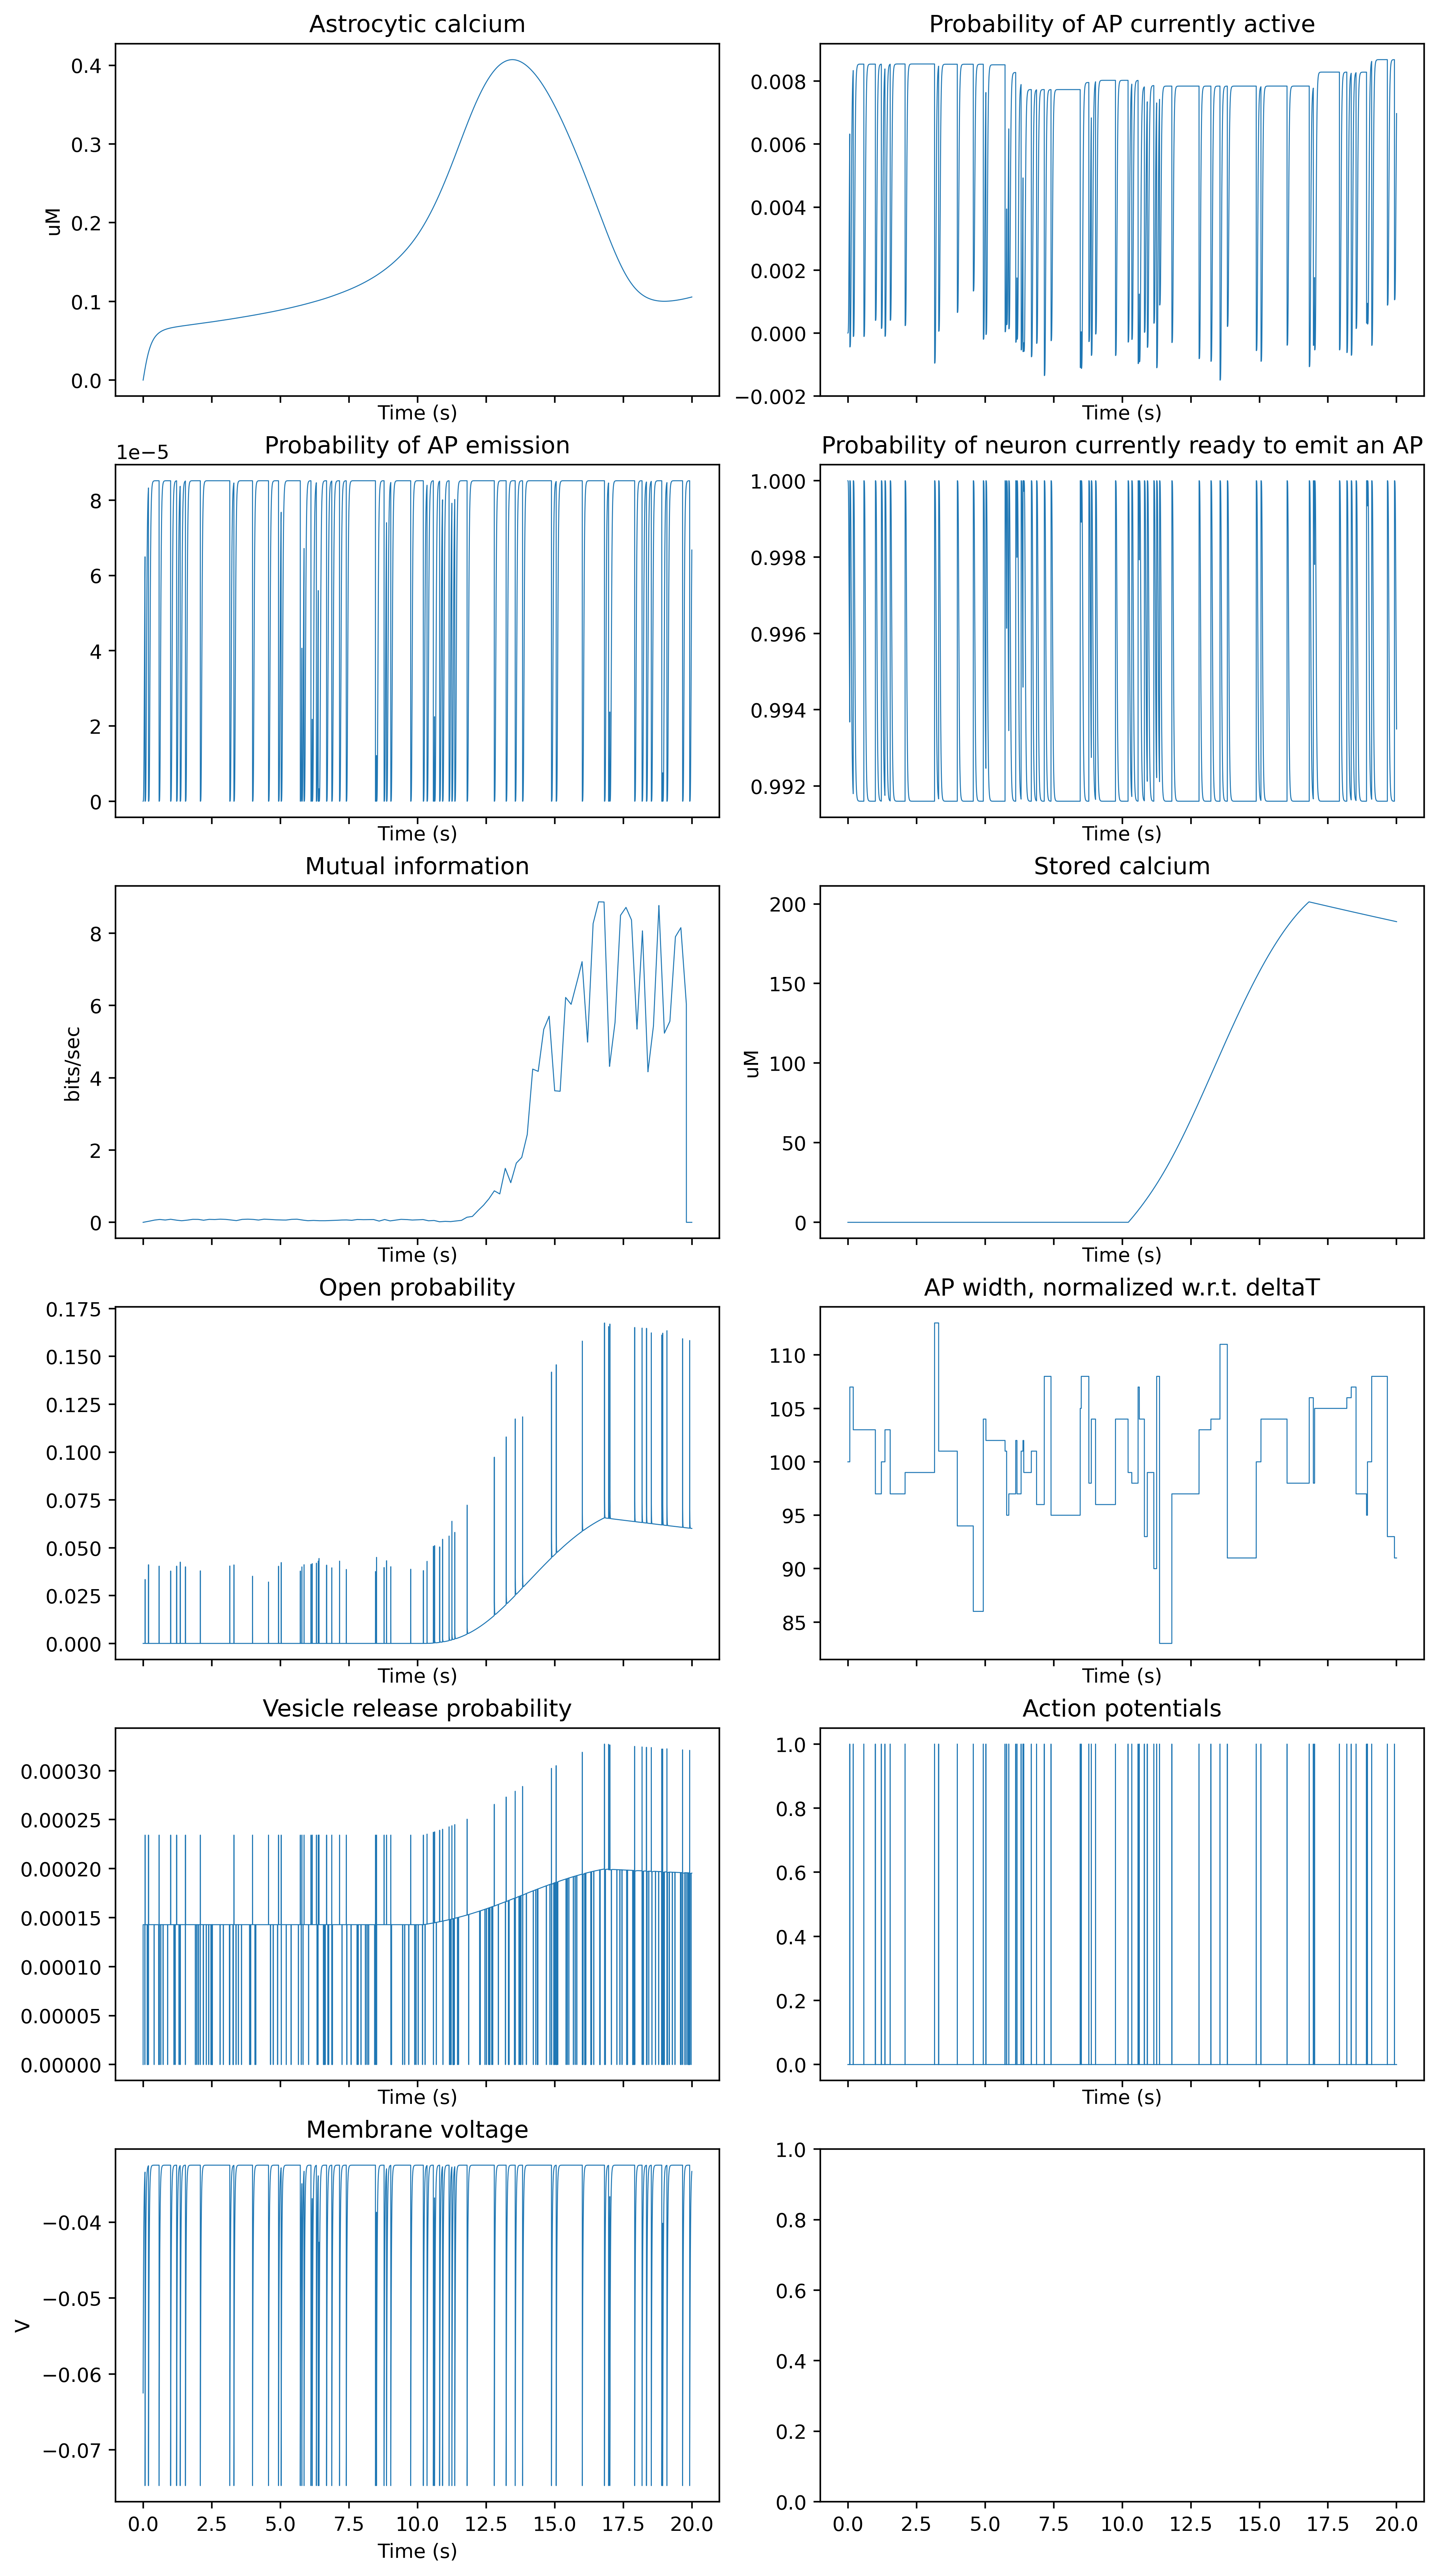

Average number of APs: 61.0 (3.0 Hz)
Average mutual information: 1.9636 bit/s


In [39]:
importlib.reload(myPlot)
importlib.reload(lib)
importlib.reload(neuron)
np.seterr(all='raise', under="warn")

SIMULATION_TIME = 20
TIME_STEP = 0.02e-3 #s

time_window_plot = 0, 20 #s

properties = neuron.Properties(
    membrane_tau = 20e-3,
    spike_duration = 2e-3,
    C = 1e-6, #F/cm^2
    t_ref_s = 2e-3, # absolute refractary period after one AP
    t_ref_v = 6.3e-3, # absolute refractary period of release vesicle machinery
    LTP_active = True,   # set to False to inactivate astrocytic feedback
    STD_active = False,
    threshold = -34.3e-3, # V
    Urest = -62.5e-3,  #V
    Threshold_rest = -48.9e-3,
    hyperp_v = -74.7e-3,
    hyperp_tau = 80e-3,
    N_v_max = 10,
    glutamate_clearance_time=2e-3
)

simulation_parameters = neuron.SimulationParameters(
    time_step = TIME_STEP,
    simulation_time = SIMULATION_TIME,
    temperature = 310, #K
    #DiffEq=False,
    current_type = "DC",
    current_amplitude = 1.5e-6,
    f_current = 500, #Hz
    N_iterations = 1
)

noise = neuron.Noise(
    thermal = False,
    axonal = False,
    AP_width_CV = 0.06,
    escape = True,
    spontaneous_release = True,
    h_init_random = True
)

my_neuron = neuron.Simulator(properties, simulation_parameters, noise)

track_variables= ["Ca_Astro", "ap_active_prob", "spike_probability_a_priori", "ap_ready_prob", 
                 "mutual_information", "Ca_stored", "open_prob", "ap_duration_count", "release_prob", "S", "u"]
""" ["u", "spike_rate", "spike_probability", "open_prob", "S", "release_rate", "release_vector",
 "N_v", "release_prob", "release_prob_a_posteriori", "ap_duration_count", "Ca_pre", "Ca_Astro" ,"Ca_stored", 
 "site_probabilities", "glu", "IP3", "h", "mutual_information", "ap_active_prob", "spike_probability_a_priori", "ap_ready_prob"]"""

#results = my_neuron.simulate(track_variables, save=False, save_each=1)
#results.release_prob.averageEach(30000)
#myPlot.drawFigure(SIMULATION_TIME, TIME_STEP, results, n_drawings=len(track_variables))
                  #, time_window=time_window_plot)
#myPlot.drawFigure(SIMULATION_TIME, TIME_STEP, results, n_drawings=len(track_variables), time_window=time_window_plot)

"""my_neuron2 = neuron.Simulator(properties, simulation_parameters, noise)
my_neuron2.s.DiffEq = False

results = my_neuron2.simulate(track_variables, save=True, save_each=1)

myPlot.drawFigure(SIMULATION_TIME, TIME_STEP, results, n_drawings=len(track_variables))
setProva = (20, 200, 500)#(2, 5, 10, 27)
aggregate = None
labels = []
for lambda_ in setProva:
    simulation_parameters.lambda_ = lambda_#properties.N_v_max = N_max
    my_neuron = neuron.Simulator(properties, simulation_parameters, noise)
    results = my_neuron.simulate(track_variables, save=True, save_each=1)
    if (aggregate == None):
        aggregate = results
    else:
        aggregate = aggregate.group(results)
    labels.append("λ=" + str(lambda_))

myPlot.drawFigure(SIMULATION_TIME, TIME_STEP, aggregate, n_drawings=len(track_variables),
                  n_plots=len(setProva), labels=labels)"""

noise.axonal = True
my_neuron = neuron.Simulator(properties, simulation_parameters, noise)
results2 = my_neuron.simulate(track_variables, save=True, save_each=1)
myPlot.drawFigure(SIMULATION_TIME, TIME_STEP, results2, n_drawings=len(track_variables))

In [30]:
import pickle
f = open("random", "rb")
print(pickle.load(f))
f.close()

[7.08287822e-01 1.63145874e-01 3.26113876e-01 3.96238392e-01
 3.94804257e-02 6.01708206e-01 6.35400961e-01 8.37114446e-01
 7.21762278e-01 1.06307539e-01 6.83763077e-01 4.83340639e-01
 4.88422548e-01 4.13600382e-01 8.63961083e-01 3.17969244e-01
 4.24736076e-01 7.26464756e-01 3.38553802e-01 4.24108971e-01
 1.54675538e-01 4.68956874e-01 4.54367743e-01 4.06039364e-01
 2.88242204e-01 5.38181002e-01 1.25250566e-01 9.03430059e-01
 4.92501823e-01 9.88740584e-02 6.05870015e-01 3.88621131e-01
 1.58105114e-02 6.98814810e-01 1.57276344e-01 9.73155455e-02
 4.22086400e-02 7.79087377e-01 9.97901869e-02 8.67993457e-02
 8.88599621e-01 3.24037262e-01 7.45780686e-02 6.95607661e-02
 9.72732615e-01 2.36004356e-01 8.00205862e-01 1.01131320e-01
 6.51831505e-03 4.25565527e-04]


In [32]:
while(True):
    continue

KeyboardInterrupt: 

In [7]:
# Save last figure
neuron.saveResults(simulation_parameters, properties, results2)

In [ ]:
importlib.reload(myPlot)
time_window_plot = 11, 12.5
myPlot.drawFigure(SIMULATION_TIME, TIME_STEP, results, n_drawings=len(track_variables), time_window=time_window_plot)